# String data

Note that string are just arrays of character data in C.  However a small hack is employed to identify the length of the string in the array.  In this notebook we'll compare the character array  to other arrays we have used and then see how the length is identified to form a C "string".

In [1]:
printf("size of character: %ld byte(s)",sizeof(char)); // 1 byte

size of character: 1 byte(s)

28

## Review of arrays in C

In [2]:
double b[10];  // array of 10 doubles

double b[10];  // array of 10 doubles

Loop to fill the array

In [3]:
int n = sizeof(b)/sizeof(double);
for (int i=0; i<n; i++){
    b[i]=2*(i+1);  // indexing always starts at 0, ends and n-1 !!!
    printf("%lf ",b[i]);
}
printf("\n");

2.000000 4.000000 6.000000 8.000000 10.000000 12.000000 14.000000 16.000000 18.000000 20.000000 


## alternate definition of the array
We can also specify the data in an array when the array is defined.  In this case the compiler will automatically calculate the size of the array.

In [4]:
double b2[] = {2,4,6,7,10,12,14,16,18,20};
int n=sizeof(b2)/sizeof(double);   // calculate the elements in the array
printf("Number of elements in array: %d\n",n);
for (int i=0; i<n; ++i) printf("%lf ",b2[i]);

Number of elements in array: 10
2.000000 4.000000 6.000000 7.000000 10.000000 12.000000 14.000000 16.000000 18.000000 20.000000 

## Characters are just 1-byte numbers in C
Relationship of numerical ASCII codes (integers) to characters

In [5]:
for (int i=65; i<=90; i++){
    printf("%2d:%c ",i,i);   // chars are just integers!
}

65:A 66:B 67:C 68:D 69:E 70:F 71:G 72:H 73:I 74:J 75:K 76:L 77:M 78:N 79:O 80:P 81:Q 82:R 83:S 84:T 85:U 86:V 87:W 88:X 89:Y 90:Z 

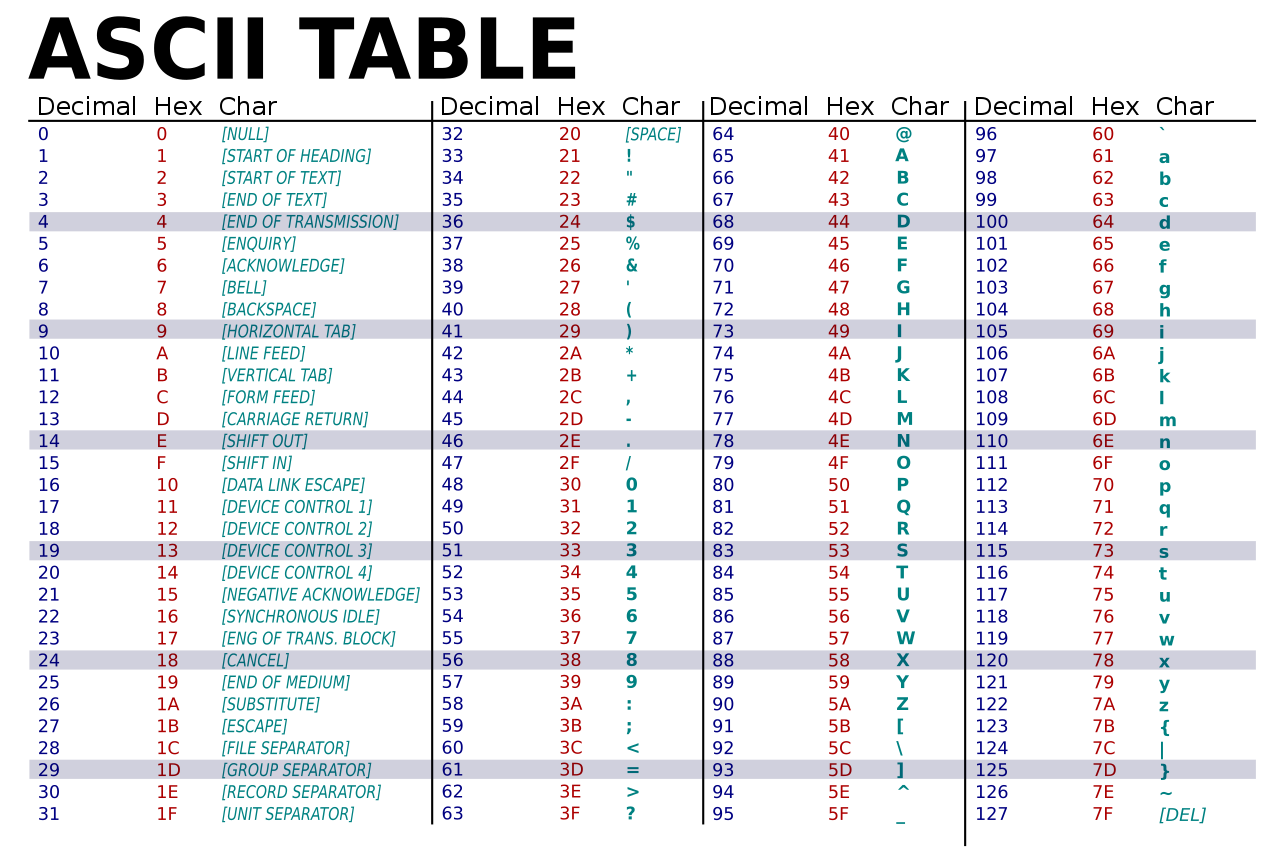

## Sizes of char arrays
In C we desdcribe a "string" as a null (==0) terminated array of characters

In [6]:
char name[15] = "fred";
printf("%ld %ld %s\n",sizeof(name),strlen(name),name);

15 4 fred


In [7]:
char name[] = "fred";
// notice the extra storage is adde by the compiler for the terminator char
printf("%ld %ld %s\n",sizeof(name),strlen(name),name); 

5 4 fred


## Char arrays are just arrays

In [8]:
char mystring[] = "the spherical cow";
printf("%ld %ld %s\n",sizeof(mystring),strlen(mystring),mystring);
for (int i=0; i<strlen(mystring); ++i)
    printf("%c",mystring[i]);  // print C-string one character at a time

18 17 the spherical cow
the spherical cow

In [9]:
// now accessing the last character in the "null terminated string"
char mystring[] = "the spherical cow";

for (int i=0; i<=strlen(mystring); ++i)
    printf("%2d|",mystring[i]);  // print C-string one character at a time

116|104|101|32|115|112|104|101|114|105|99|97|108|32|99|111|119| 0|

## Watch out for buffer overwrites!

In [26]:
char input[5];
char newstr[]="1234";
sscanf("abcdef","%s",input);
printf("input:%s newstr: %s",input,newstr);

input:abcdef newstr: f

What's going on here?

In [27]:
for (int i=0; i<5; ++i) printf("%3d:%c ",newstr[i],newstr[i]);

102:f   0:   51:3  52:4   0:  

## Examples of functions in string.h
See: https://en.cppreference.com/w/c/string/byte
### length vs size

In [10]:
#include <string.h>
char mystring[] = "abcd";
char numstring[]= "1234";
printf("lengths: %ld %ld\n",strlen(mystring),strlen(numstring));
printf("sizes: %ld %ld\n",sizeof(mystring),sizeof(numstring));
printf("is number: %ld %ld\n",sizeof(mystring),sizeof(numstring));


lengths: 4 4
sizes: 5 5
is number: 5 5


### comparisons

In [11]:
char mystring[] = "abcd";
char numstring[]= "1234";
strcmp(mystring,mystring)  // 0 returned on equality

0

In [12]:
strcmp(mystring,numstring)  // non-zero if strings differ

48

In [13]:
strcmp(numstring,mystring)  // notice the sign change  "abcd" < "1234" in ASCII ordering

-48